# From the TASEP Model to the Bridge Model: Monte Carlo Simulation to investigate Non-Equilibrium Phase Transition and Symmetry Breaking

Author:
 - Giulio Vicentini

The purpose of this project is to simulate two paradigmatic driven systems in non-equilibrium statistical physics, namely, the TASEP and the Bridge model, to investigate the phenomena of non-equilibrium phase transitions and to introduce the so-called Symmetry Breaking phenomenon.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import Image

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## The TASEP Model

The Totally Asymmetric Simple Exclusion Process (TASEP) is a paradigmatic example in non equilibrium statistical physics to model biological transport and vehicular traffic.<br>
The meaning of the name is straightforward: particles can move in only one direction (because the process
is totally asymmetric) and each site can be occupied by one particle at the most (because
of exclusion).<br>
In this project we concentrate in a Open Boundary Conditons system, as shown in the figure.

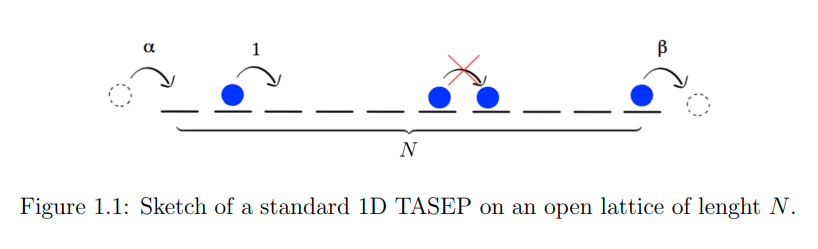

In [105]:
Image('tasep_model.png')

The dynamical evolution works as follows. Starting from any configuration with N particles, we choose randomly a site $k$: if it is occupied ($n_k = 1$) and the site to the right is empty ($n_{k+1} = 0$), the particle moves from
site $k$ to site $k+1$. 
We allow particles to be injected at rate $α$ to the left (site $i = 1$) and to be removed at rate $β$ from the right (site $i = L$). The system evolves as follows. We choose randomly an integer $k = 0, . . . , L$.
If $k = 0$ and $n_1 = 0$, we inject a new particle with probability $α$. If $0 < k < L$, $n_k = 1$,
and $n_{k+1} = 0$, we move the particle from $k$ to $k + 1$. If $k = L$ and $n_L = 1$, we remove
the particle with probability $β$. <br>
After some transient, dependent on the initial conditions, we can imagine the system sets in a nonequilibrium steady state, i.e., a state whose statistical properties do not depend on time.
It is clear, by the way, that the system does not satisfy translational invariance and we do not expect mean-field approximation to be exact.

### Example

In [8]:
def update_tasep(state, alpha=1, beta=1):
    '''
    main tasep dynamic
    '''
    
    #state=np.zeros(L+1)
    #for i in range(Ntime):
    L=len(state[0])
    k=random.randint(0,L-1)
    if k==0:
        if random.random() < alpha: state[0][k+1]=1
    elif k==L-1:
        if random.random() < beta: state[0][k]=0
    elif state[0][k]==1 and state[0][k+1]==0: 
        state[0][k+1]=1
        state[0][k]=0

    return state

In [9]:
def plot_states(state, index=0):
  '''
  Handler for plotting and saving frames.
  '''
  fig, ax = plt.subplots(figsize=(20,10))

  
  ax.matshow(state, cmap = ListedColormap(['white', 'red'])) 
  ax.set_xticks(np.arange(-0.5,21,1))
  ax.set_xticklabels(['']*22)
  ax.set_yticks([])
  plt.grid(c='black')

  plt.tight_layout()
  #fig.savefig('images/'+str(index)+'.png', dpi=fig.dpi)
  plt.close()
  
  return 

In [10]:
state = np.zeros((1,21))
state[0][0]=1

# Evolve
steps = int(4e2)

for i in range(steps):
    state = update_tasep(state)
    plot_states(state, index=i)

In [1]:
import os
import imageio

png_dir = 'images/'
images = []

names = []

# Get names
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        names.append(file_name)
        
# Sort names
names = sorted(names, key=lambda x: int(x.split('.')[0]))

# Create gif
for name in names:
    file_path = os.path.join(png_dir, name)
    images.append(imageio.imread(file_path))
imageio.mimsave('movieT.gif', images)

![SegmentLocal](movieT.gif "segment")

## Mean-Field Analysis

Under these assumptions it is straightforward to derive the evolution equation for the average occupation of each site. In the bulk one has:

$$\frac{d}{dt}\langle n_i\rangle = \langle n_{i-1}(1 - n_i)\rangle - \langle n_i(1- n_{i+1})\rangle = \langle j_{i-1}\rangle - \langle j_{i} \rangle$$

where $n_i$ is the occupation of the i-th site, and $\langle j_i\rangle := \langle n_i(1 - n_{i+1})\rangle$ is the average current from site $i$ to site $i + 1$. For what concerns the first and the last lattice site, on the other hand, one finds, respectively:

$$\frac{d}{dt} \langle n_1 \rangle = \alpha \langle 1-n_1 \rangle - \langle n_1(1 - n_2)\rangle$$
$$\frac{d}{dt} \langle n_N \rangle = \langle n_{N-1} (1 - n_N )\rangle - \beta \langle n_N\rangle $$

From these equations we see that, in order to compute the time evolution of the average occupation, we need also the higher moments of its distribution. One way to go around this inconvenience and be able to compute the steady state density and average current would be to perform a mean field approximation and disregard possible contributions of the correlations.
In the limit of $N \rightarrow \infty$, this solution for the steady state distributions yields the phase diagram drawn in the figure: three phases are possible and the transitions between them is driven by the entrance end exit rates. For low $\alpha$ and high $\beta$ the system is in a low density (LD) phase, for low $\beta$ and high $\alpha$ it is in a high density phase (HD), while for both $\alpha$ and $\beta$ bigger than 1/2, the system is in the so called maximal current (MC) phase, in which, as the name sugests, the average
bulk current assumes its maximum value. The transitions between the MC phase and the LD and between the MC and HD are continuous, while the one between HD and LD phases is not. More quantitatively, the value of the
density in the three phases is given by:

- $\rho_{LD}(\alpha) = \alpha$
- $\rho_{MC} = \frac{1}{2}$
- $\rho_{HD}(\beta)=1-\beta$ 

where we called $\rho$ the average density: $\rho := \langle n \rangle$.

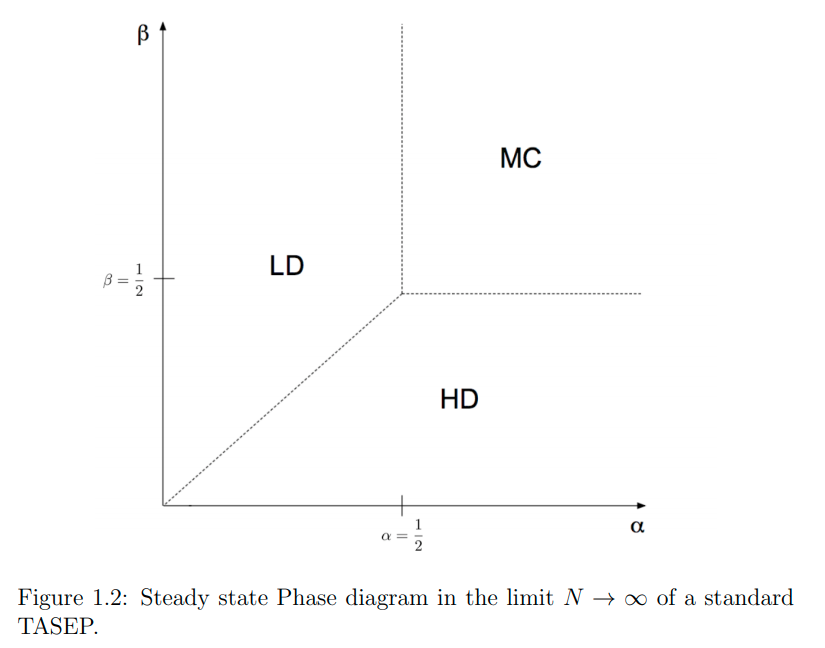

In [106]:
Image('tasep_phase.png')

Overall, from the mean-field analysis we expect the following steady states:

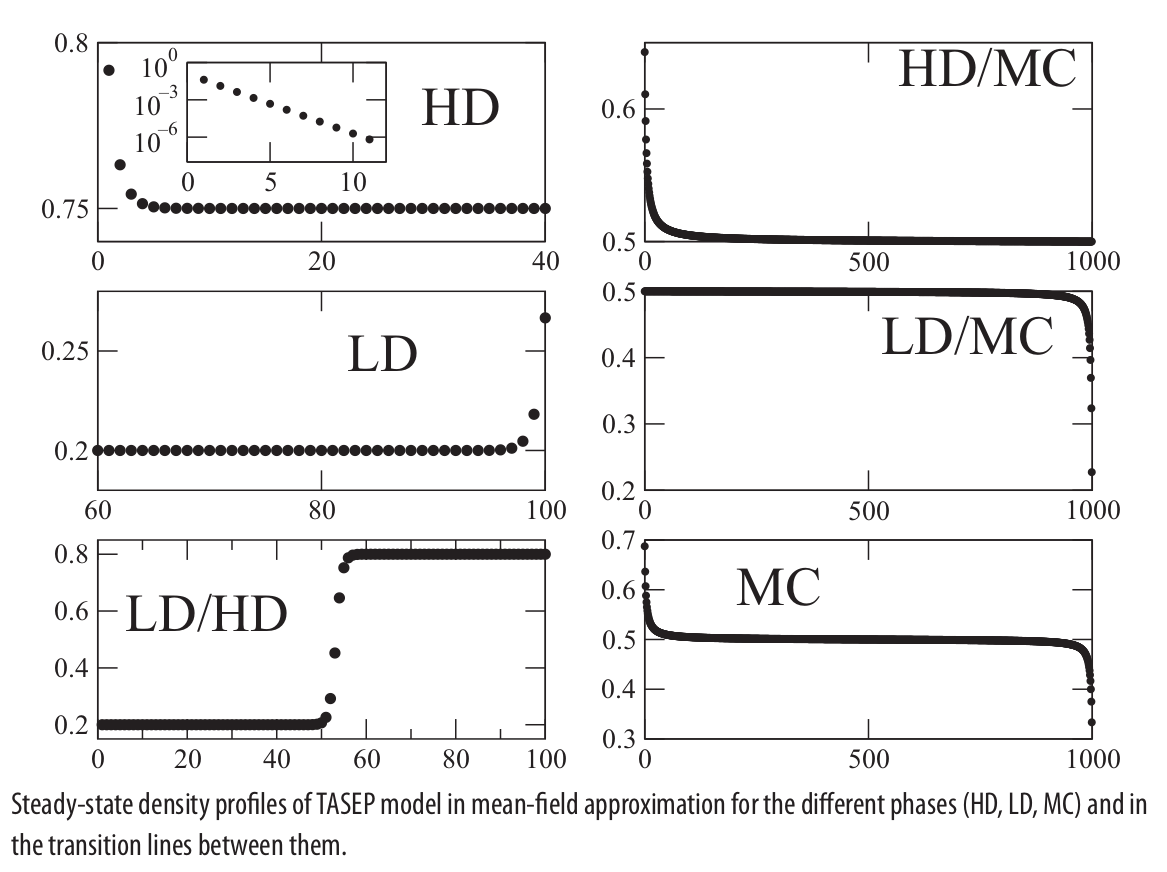

In [107]:
Image('tasep_steady_state.png')

Now we try to check this behaviours trough simulations

## Simulation

In [2]:
def tasep(L=50, alpha=0.3, beta=0.2, Ntime=int(1e6), Nsim=int(1e1)):
    '''
    main tasep dynamic
    '''
    dens = np.zeros((Nsim,L+1))
    for a in range(Nsim):
        state=np.zeros((Ntime,L+1))
        for i in range(Ntime):
            state[i]=state[i-1]
            k=random.randint(0,L)
            if k==0:
                if random.random() < alpha: state[i][k+1]=1
            elif k==L:
                if random.random() < beta: state[i][k]=0
            elif state[i][k]==1 and state[i][k+1]==0: 
                state[i][k+1]=1
                state[i][k]=0
    
        s = state.mean(axis=0)
        dens[a] = s
    
    mdens = dens.mean(axis=0)
    x = np.arange(0,L)
    
    return x, mdens[1:]

### High Density (HD) ($\alpha=0.3$, $\beta=0.2$)

Starting from the High Density (HD) phase: in simple words, this solution appears when we are injecting more particles than we are removing ($\alpha > \beta$) and removal is not fully efficient ($\beta < 1/2$). In this conditions, particle density gets constant toward the exit and equal to the stable fixed point $\rho = 1 - \beta$, and the current is equal to $J = \beta(1-\beta)$

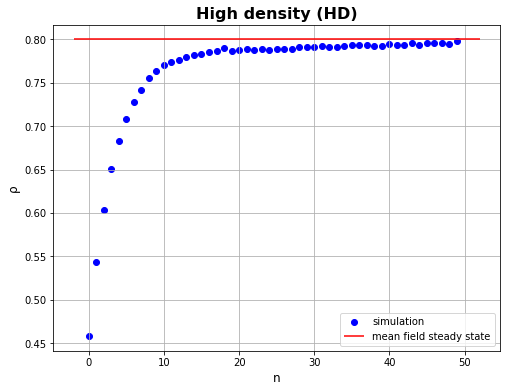

In [5]:
alpha=0.3
beta=0.2

x, y = tasep(L=50, alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
plt.hlines(1-beta, xmin=-2, xmax=52, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('High density (HD)',  fontsize = 16, fontweight = "bold")
plt.legend(loc='best')
plt.grid()

### Low Density (LD)  ($\alpha=0.2$, $\beta=0.3$)

For what concern the Low Density (LD) phase: the motions of particles driven to the right can be understood as the motion of holes (empty sites) driven to the left. Since the hole density is one minus the particle density, holes are injected on the right at rate $\beta$ and removed on the left at rate $\alpha$. This means that the symmetric of the HD phase ($\beta > \alpha$ and $\alpha < 1/2$) must correspond to a low denisty (LD) phase, where particle density is constant close to the left edge and equal to the low density fixed point $\rho = \alpha$

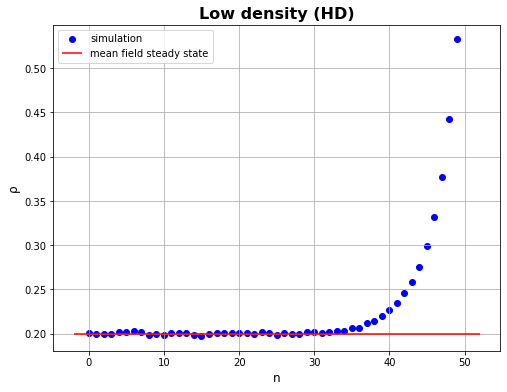

In [6]:
alpha=0.2
beta=0.3

x, y = tasep(L=50, alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
plt.hlines(alpha, xmin=-2, xmax=52, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Low density (LD)',  fontsize = 16, fontweight = "bold")
plt.legend()
plt.grid()

### Maximal Current (MC)  ($\alpha=1$, $\beta=1$)

The remaining phase ($\alpha, \beta > 1/2$) is caracterized by $J$ that reaches its greatest possible value ($J=1/4$). For this reason is called Maximal Current (MC) phase.

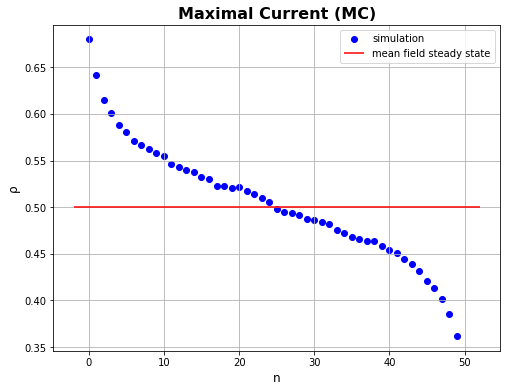

In [10]:
alpha=0.8
beta=0.7

x, y = tasep(L=50, alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
plt.hlines(0.5, xmin=-2, xmax=52, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Maximal Current (MC)',  fontsize = 16, fontweight = "bold")
plt.legend()
plt.grid()

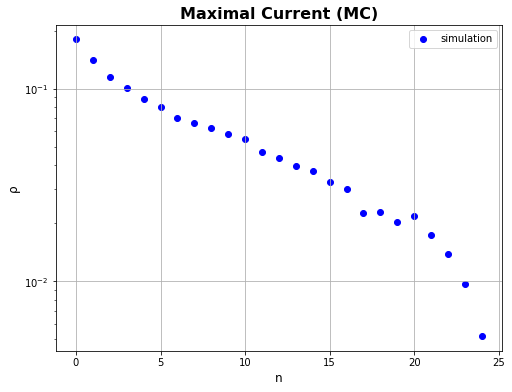

In [11]:
plt.subplots(figsize=(8,6))
plt.scatter(x[0:25], y[0:25]-0.5, c='blue', label='simulation')
#plt.hlines(0.5, xmin=-2, xmax=52, colors='red', label='mean field steady state')
plt.yscale('log')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Maximal Current (MC)',  fontsize = 16, fontweight = "bold")
plt.legend()
plt.grid()

The mean-field approximation fails, for example, to reproduce the exact steady profile in the MC phase, whose
region of constant density p is approached with a power law equal to one, while the exact result
gives a square root at denominator.

### Phase Transition HD/MC  ($\alpha=0.8$, $\beta=0.5$)

Concentrating on the phase transition: the two line ($\alpha=1/2, \beta > 1/2$) and ($\alpha>1/2, \beta = 1/2$) represent the continuos LD/MC and HD/MC respectively. In both cases the density goes continuosly from the high density or low density fixed point toward $\rho=1/2$

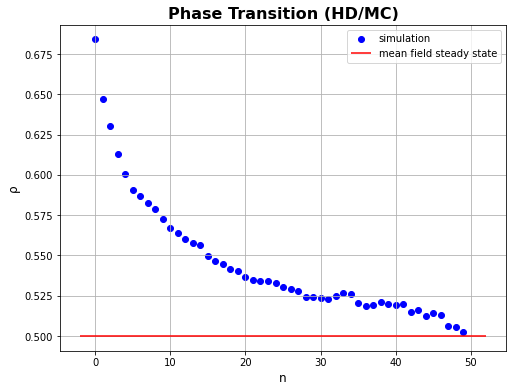

In [12]:
alpha=0.8
beta=0.5

x, y = tasep(L=50, alpha=alpha, beta=beta, Ntime=int(1e6))

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
plt.hlines(0.5, xmin=-2, xmax=52, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Phase Transition (HD/MC)',  fontsize = 16, fontweight = "bold")
plt.legend()
plt.grid()

### Phase Transition LD/MC  ($\alpha=0.5$, $\beta=0.8$)

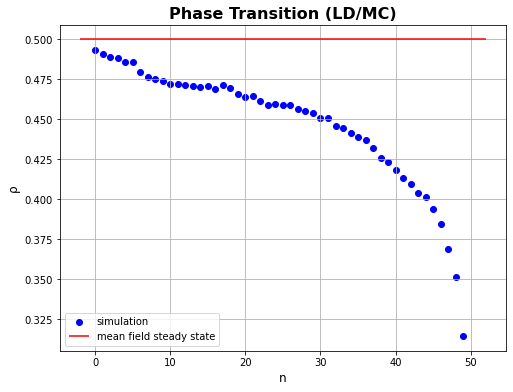

In [9]:
alpha=0.5
beta=0.8

x, y = tasep(L=50, alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
plt.hlines(0.5, xmin=-2, xmax=52, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Phase Transition (LD/MC)',  fontsize = 16, fontweight = "bold")
plt.legend(loc='lower left')
plt.grid()

To appreciate better the steady density profile in the continuos phase transition longer simulation are needed. Furthermore we have to remember that this simulation tends to recreate the optimal conditions of the mean-field analysis only in the thermodynamic limit, but again, larger are the systems longer have to be the the simulation time.

### Phase Transition HD/LD  ($\alpha=0.2$, $\beta=0.2$)

On the other hand, the separation line HD/LD corresponds to a transition between the high density fixed point and the low density fixed point, therefore indicating a discontinuity. What happens in that line? <br>
In the mean field equations, the solution is a trajectory that simply connects the fixed points form $\rho=\alpha$ to $\rho=1-\beta$

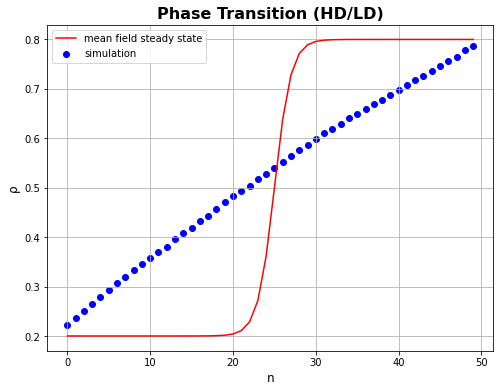

In [8]:
alpha=0.2
beta=0.2

x, y = tasep(L=50, alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
plt.plot(x, 0.2+0.6*(1/(1+np.exp(-(x-25)))), c='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Phase Transition (HD/LD)',  fontsize = 16, fontweight = "bold")
plt.legend()
plt.grid()

## Non continuos phase transition: the case HD/LD

As one can easily notice the latter case does not match with the mean field result. The straight line in the HD/LD simulation does not correspond with the sigmoide-like behaviours showed in the figure above. <br>
The line $\alpha=\beta<1/2$ separates the HD and LD phases. If we solve MF equations for a point on that line, we get a sationarity, stable profile of the density $\rho$ that connects the two fixed points.
As a matter of fact, the mean field analysis does not take into consideration the stochastic fluctations that can be observed with numerical methods. These are of fundamental importance since allow to observe the so-called domain walls that diffuse from the whole system passing from the low density phase to the high density one. <br>
It is reasonable to expect that fluctuations (which are absent in MF)
might be relevant in this case, allowing the domain wall between LD and HD phases to
fluctuate and diffuse. This is exactly what happens: the wall diffuses on a time scale of
order $L^2$ , without one phase dominating over the other. Therefore, this process should
not be confused with spontaneous symmetry breaking.

In [13]:
L=50
alpha=0.2
beta=0.2
Ntime=int(1e4)

state=np.zeros((Ntime,L+1))
for i in range(Ntime):
    state[i]=state[i-1]
    k=random.randint(0,L)
    if k==0:
        if random.random() < alpha: state[i][k+1]=1
    elif k==L:
        if random.random() < beta: state[i][k]=0
    elif state[i][k]==1 and state[i][k+1]==0: 
        state[i][k+1]=1
        state[i][k]=0

The idea is to highlight the diffusive behaviour of the domain wall that move from the initial state (where the particles begin to enter in the system) and the last one (where the particle concentrate in the last sites).

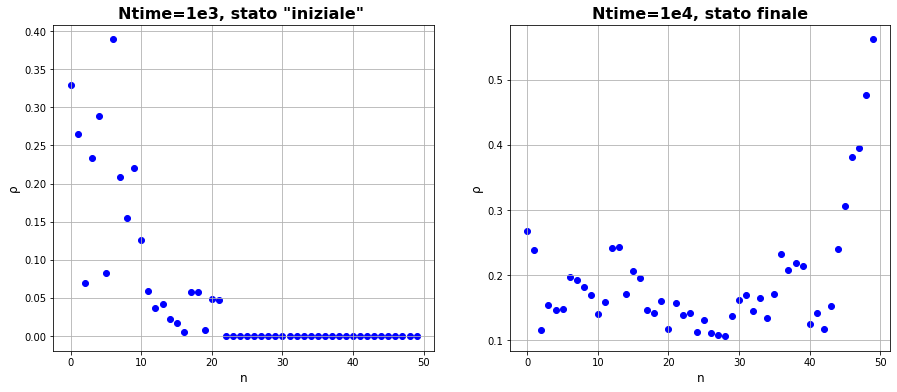

In [25]:
x = np.arange(0,L)
si = state[:int(1e3)].mean(axis=0)
sf = state.mean(axis=0)
    
#plot
plt.figure(figsize=(15,6))
axi=plt.subplot(1,2,1)
axi.scatter(x, si[1:], c='blue', label='HD/LD')
axi.set_xlabel('n', fontsize = 12)
axi.set_ylabel('ρ', fontsize = 12)
axi.set_title('Ntime=1e3, stato "iniziale" ',  fontsize = 16, fontweight = "bold")
plt.grid()

axf=plt.subplot(1,2,2)
axf.scatter(x, sf[1:], c='blue', label='HD/LD')
axf.set_xlabel('n', fontsize = 12)
axf.set_ylabel('ρ', fontsize = 12)
axf.set_title('Ntime=1e4, stato finale',  fontsize = 16, fontweight = "bold")
plt.grid()

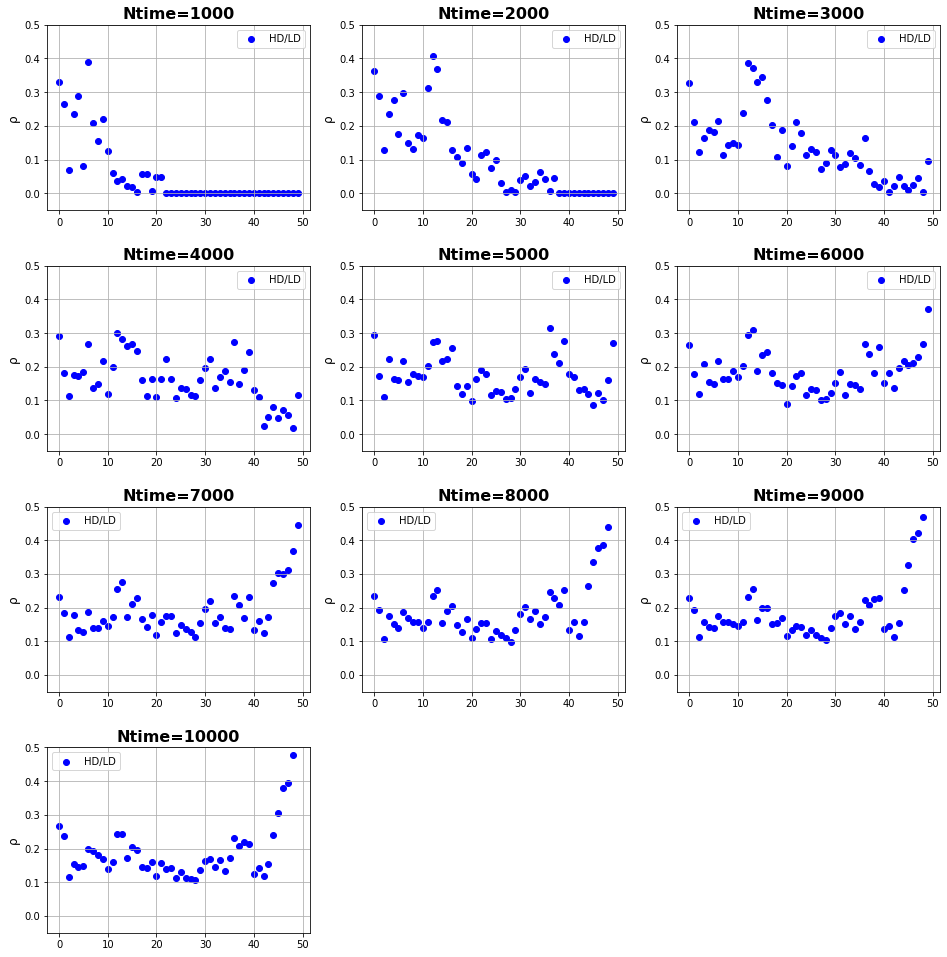

In [24]:
x = np.arange(0,L)
ss = []

plt.figure(figsize=(16,30))
for i, j in enumerate(np.arange(0, 10, 1)):
  ax=plt.subplot(7,3,i+1)
    
  s = state[:int(Ntime//10*(j+1))].mean(axis=0)
    
  #plot
  ax.scatter(x, s[1:], c='blue', label='HD/LD')
  #ax.plot(Ts[Tmax+tt[i]:], Chi[Tmax+tt[i]:]/N[i]**2, 'o',color=col[i], label='N={}'.format(N[i])  )
  #ax.text(0.8,0.5,'γ = {}\nTc = {}'.format('%.3f'%(-1*gammas[i]),'%.3f'%TCs[i]), transform=ax.transAxes,bbox=dict(facecolor=col[i], alpha=0.7), fontsize=12)
  #ax.set_xlabel('n', fontsize = 12)
  ax.set_ylabel('ρ', fontsize = 12)
  ax.set_ylim(-0.05,0.50)
  ax.set_title('Ntime={}'.format(int(Ntime//10*(j+1))),  fontsize = 16, fontweight = "bold")
  #ax.xaxis.set_minor_locator(MultipleLocator(0.05))
  #ax.yaxis.set_minor_locator(MultipleLocator(1))
  plt.legend()
  plt.grid()

plt.subplots_adjust(hspace=0.3)  
plt.show()

Even if it is not easy to observe a clear dynamic of the domain wall, we notice how, in this phase, the wall move from the head of the lattice to the tail thorugh all the simulation. <br>
Probabibly, a deeper investigation of the time scale is needed to better appreciate this effect.

## Spotaneous Symmetry Breaking: The Bridge Model

We have discussed in detail the phase diagram of TASEP because such a model is the
building block of the bridge model. We will see how this model show the symmetry breaking. In order to study this phenomenon we need two classes of particles: we can imagine having positively and negatively charged particles
moving in opposite directions under the action of a field, but the name “bridge model”
derives from a macroscopic model, where particles mimic vehicles traveling in opposite
directions along a one-lane bridge. Traffic is not regulated by lights and vehicles may enter
the bridge from opposite sides. You can imagine obtaining this model by combining two
TASEP models with additional rules controlling the intersection of vehicles/particles.
In simple terms, positive/negative particles are
injected to the left/right with rate α and extracted from the right/left at rate β. Injection
of a new particle is possible only if the site is empty. When different particles meet, they
can exchange with probability q. We assume that the two classes of particles have the same
injection/extraction rates, because we want to study the spontaneous symmetry breaking.
As a matter of fact, if (for example) their injection rates were different, it would not be
surprising that the resulting positive/negative currents and densities are also different.
Instead, the problem of spontaneous symmetry breaking arises when kinetic rules for the
two classes of particles are exactly the same.

More rigorously, the bridge model is defined as follows. Each site $i = 1, . . . , L$ is occupied by a positive particle $+1$, by a negative particle $-1$, or it is empty $0$. We choose randomly an integer $k=0,1,\dots,L$. If $k \neq 0, L$, the only microscopic processes giving rise to evolution are
\begin{equation}
    \begin{cases}
        +1_{k}0_{k+1} \longrightarrow 0_{k}+1_{k+1} \qquad \text{with probability }1 \\
        0_{k}-1_{k+1} \longrightarrow -1_{k}0_{k+1} \qquad \text{with probability }1 \\
        +1_{k}-1_{k+1} \longrightarrow -1_{k}+1_{k+1} \qquad \text{with probability }q
    \end{cases}
\end{equation}
All other processes involving sites $k, k + 1$ have zero probability. As for boundary conditions, they enter when $k = 0$ or $k = L$. The only permitted processes are: <br>
- if $k=0$
\begin{equation}
    \begin{cases}
        0_1 \rightarrow +1_1 \qquad \text{with probability} \alpha \\
        -1_1 \rightarrow 0_1 \qquad \text{with probability} \beta
    \end{cases}
\end{equation}
- if $k=L$
\begin{equation}
    \begin{cases}
        0_L \rightarrow -1_L \qquad \text{with probability} \alpha \\
        1_L \rightarrow 0_L \qquad \text{with probability} \beta
    \end{cases}
\end{equation}

Despite appearances, evolution rules are simple. Overall, particles
move as in TASEP with the additional condition that opposite particles can exchange their
position with probability q. At boundaries, particles are injected with
rate α and extracted with rate β. One caveat should be stressed: exchange of particles at
boundaries is not allowed; therefore, a particle cannot get onto the bridge if the entry site
is occupied by an opposite particle waiting to get off.
In summary, we have two classes of particles traveling in opposite directions and having
the same dynamical rules. Is it possible that a spontaneous symmetry breaking occurs,
making currents and densities of positive and negative particles different? This is a natural
question if we think at the regime β << 1 and α, q ≈ 1, because in this regime each
flux of particles would tend to stabilize itself into the HD phase, which is manifestly
impossible, because the system cannot sustain a density larger than $\frac{1}{2}$ for two different
classes of particles at the same time. The solution might be an equal reduction of both
densities. In fact, as we will see in MF a symmetric solution exists for any point of the
phase diagram (α, β), and in the region β << α, q it is a symmetric LD phase. However,
this phase may be unstable in much the same way an equilibrium symmetric state with no
magnetization is unstable below $T_C$ in a ferromagnetic material.
We will see that this instability leads one type of particles to dominate, therefore
producing a symmetry breaking. Which class of particles dominates depends on the initial
conditions and on fluctuations: the same state may lead to a dominance of positive particles
or to a dominance of negative particles. The key point, however, is that a true phase
transition occurs only in the thermodynamic limit, so it will be of great interest to study the
dynamics with varying the size L.

In [4]:
def Bridge(L=50, alpha=0.3, beta=0.2, q=1, Ntime=int(1e6), Nsim=int(1e1), neg=False):
    
    '''
    main bridge dynamic
    '''
    
    a=0
    b=2
    if neg==True:
        a=-1
        b=1
    
    dens = np.zeros((Nsim,L+1))
    for j in range(Nsim):
        state=np.zeros((Ntime,L+1))
        #state[0]= np.random.randint(a,b, size=L+1)
        for i in range(Ntime):
            if i>0 : state[i]=state[i-1]
            k=random.randint(0,L)
            if k==0:
                if state[i][k+1]==0:
                    if random.random() < alpha: state[i][k+1]=1
                elif state[i][k+1]==-1:
                    if random.random() < beta: state[i][k+1]=0
            elif k==L:
                if state[i][k]==1:
                    if random.random() < beta: state[i][k]=0
                elif state[i][k]==0:
                    if random.random() < alpha: state[i][k]=-1
            elif state[i][k]==1 and state[i][k+1]==0: 
                state[i][k+1]=1
                state[i][k]=0
            elif state[i][k+1]==-1 and state[i][k]==0: 
                state[i][k]=-1
                state[i][k+1]=0
            elif state[i][k]==1 and state[i][k+1]==-1:
                if random.random() < q:
                    state[i][k+1]=1
                    state[i][k]=-1
            elif state[i][k+1]==-1 and state[i][k]==1:
                if random.random() < q:
                    state[i][k]=-1
                    state[i][k+1]=1
    
        s = state.mean(axis=0)
        dens[j] = s
    
    mdens = dens.mean(axis=0)
    x = np.arange(0,L)
    
    return x, mdens[1:]

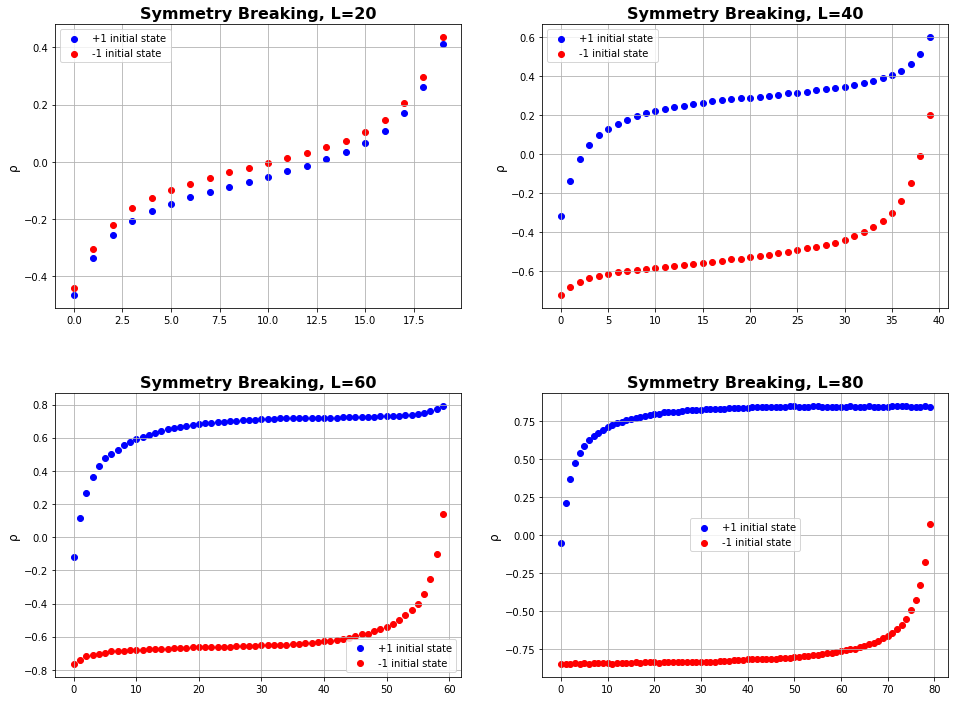

In [28]:
plt.figure(figsize=(16,12))
for i, j in enumerate(np.arange(20, 100, 20)):
  ax=plt.subplot(2,2,i+1)
    
  x0, y0 = Bridge(L=j, alpha=1, beta=0.1, q=1, neg=False)
  x1, y1 = Bridge(L=j, alpha=1, beta=0.1, q=1, neg=True)
    
  #plot
  plt.scatter(x0, y0, c='blue', label='+1 initial state')
  #plt.hlines(alpha, xmin=-2, xmax=102, colors='red', label='mean field steady state')
  plt.scatter(x1, y1, c='red', label='-1 initial state')
  #ax.plot(Ts[Tmax+tt[i]:], Chi[Tmax+tt[i]:]/N[i]**2, 'o',color=col[i], label='N={}'.format(N[i])  )
  #ax.text(0.8,0.5,'γ = {}\nTc = {}'.format('%.3f'%(-1*gammas[i]),'%.3f'%TCs[i]), transform=ax.transAxes,bbox=dict(facecolor=col[i], alpha=0.7), fontsize=12)
  #ax.set_xlabel('n', fontsize = 12)
  ax.set_ylabel('ρ', fontsize = 12)
  ax.set_title('Symmetry Breaking, L={}'.format(j),  fontsize = 16, fontweight = "bold")
  #ax.xaxis.set_minor_locator(MultipleLocator(0.05))
  #ax.yaxis.set_minor_locator(MultipleLocator(1))
  plt.legend(loc='best')
  plt.grid()

plt.subplots_adjust(hspace=0.3)  
plt.show()

We observe how, increasing the size of the systems, the symmetry breaking effect becomes more evident. As expected by a finite-size analysis.

In the end, without concentrate too much on the analysis of the system, it is possible to give a look also to the main staionary states of the Bridge Model, that are described by the following this phase diagram:

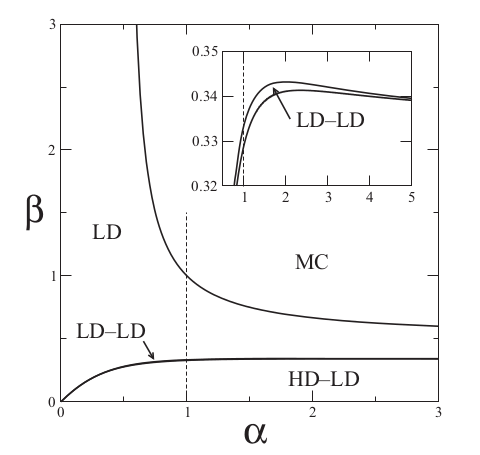

In [29]:
Image('bridge_phases.png')

For $q=1$the bridge can be fromulated in terms of two TASEP model. We can therefore solve the bridge model self-consistently. <br>
Following this argument we find the LD and MC symmteric phase, while the HD symmteric phase cannot exist. Instead we find two different types of asymmteric phases, the HD-LD and the LD-LD one. <br>
Altought, being stick with the concept of rates $\alpha$ and $\beta$ as probability is difficult to investigate the LD-LD phase, that is confined in a very restricted region, as showed in figure.

### Low Density (LD) ($\alpha=0.2$, $\beta=0.3$)

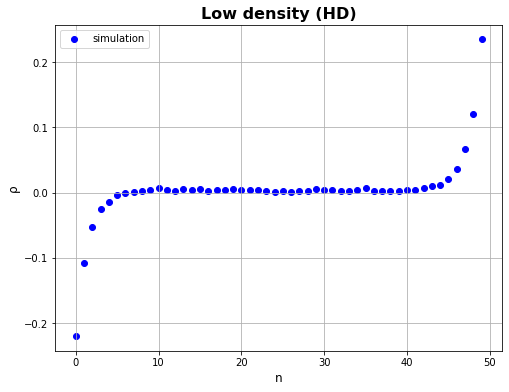

In [38]:
alpha=0.2
beta=0.3

x, y = Bridge(alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
#plt.hlines(alpha, xmin=-2, xmax=102, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Low density (LD)',  fontsize = 16, fontweight = "bold")
plt.legend()
plt.grid()

### Maximal Current (MC) ($\alpha=1$, $\beta=1$)

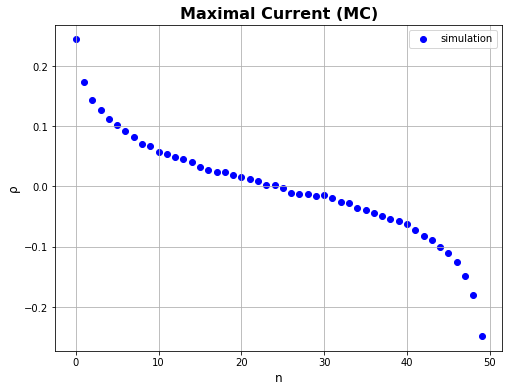

In [41]:
alpha=1
beta=1

x, y = Bridge(alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
#plt.hlines(0.5, xmin=-2, xmax=102, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('Maximal Current (MC)',  fontsize = 16, fontweight = "bold")
plt.legend()
plt.grid()

### High density (HD-LD) ($\alpha=0.8$, $\beta=0.2$)

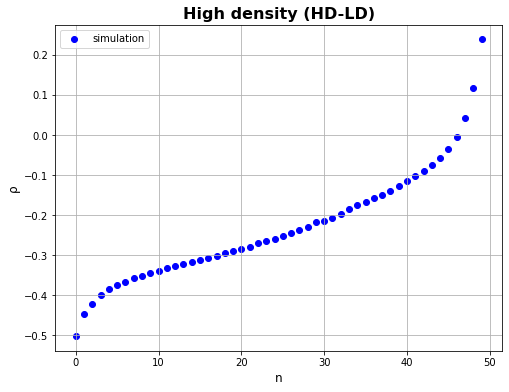

In [5]:
alpha=0.8
beta=0.2

x, y = Bridge(alpha=alpha, beta=beta)

plt.subplots(figsize=(8,6))
plt.scatter(x, y, c='blue', label='simulation')
#plt.hlines(1-beta, xmin=-2, xmax=102, colors='red', label='mean field steady state')
plt.xlabel('n', fontsize = 12)
plt.ylabel('ρ', fontsize = 12)
plt.title('High density (HD-LD)',  fontsize = 16, fontweight = "bold")
plt.legend(loc='best')
plt.grid()

## Conclusion

In this project we managed to study two importan paradigmatic model in non-equlibrium statistical mechanics: the TASEP and the Bridge. These twos give as the opportunity to investigate the phenomena of non-equilibrium phase transition and symmetry breaking. In particular we showed:
- the steady density profiles in all the different phases of the TASEP model;
- the peculiar behaviour of the non continuos HD/LD phase transition;
- the phenomenon of symmetry breaking in the Bridge model via a finite-size analysis.

This project lead us to a clearer understanding of these arguments and open the possibility to a deeper investigation of these systems. For example, in the case of the bridge model, a more sophisticated Kinetic Monte Carlo algorithm could be used to have more flexibility on the rates to allow to study the LD-LD phase.